#  Winpython Default checker (for Python 3.5)

In [1]:
%matplotlib inline

## Compilers: Numba (and Cython , only if you have visual studio 2015)

Mandelbrot created by numba in 2.097041 s


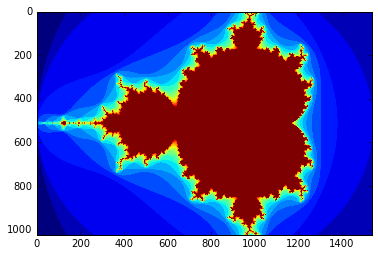

In [2]:
# checking Numba JIT toolchain + Mingwpy compiler toolchain
import numpy as np
image = np.zeros((1024, 1536), dtype = np.uint8)

from pylab import imshow, show
from timeit import default_timer as timer
from numba import autojit

@autojit
def mandel(x, y, max_iters):
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters

def create_fractal(min_x, max_x, min_y, max_y, image, iters , mandelx):
  height = image.shape[0]
  width = image.shape[1]
  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandelx(real, imag, iters)
      image[y, x] = color
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20 , mandel) 
dt = timer() - start

print ("Mandelbrot created by numba in %f s" % dt)
imshow(image)
show()

In [3]:
# Cython toolchain test (ONLY IF YOU HAVE VISUAL STUDIO 2015)
%load_ext Cython

##  Graphics: Matplotlib, Pandas, Seaborn, Bokeh, Holoviews, bqplot

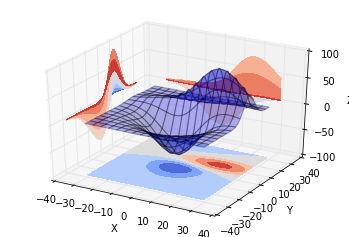

In [4]:
# Matplotlib
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

In [5]:
# Pandas interactive
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
# create a df with random datas
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan

# interactive
from IPython.html import widgets
@widgets.interact
def f(h_neg=(0, 359, 1), h_pos=(0, 359), s=(0., 99.9), l=(0., 99.9)):
    return (df
             .style
             .background_gradient(
                cmap=sns.palettes.diverging_palette(
                     h_neg=h_neg, h_pos=h_pos, s=s, l=l, as_cmap=True)
             ).highlight_null()
           )

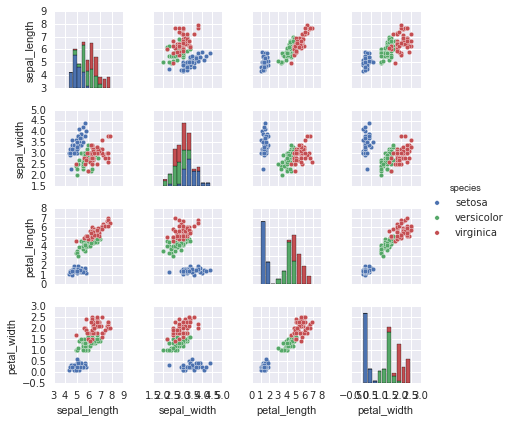

In [6]:
# Seaborn
# for more examples, see http://stanford.edu/~mwaskom/software/seaborn/examples/index.html
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", size=1.5)


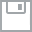
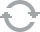
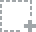
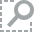
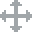
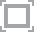
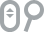
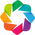
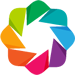
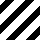
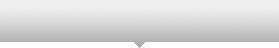
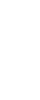
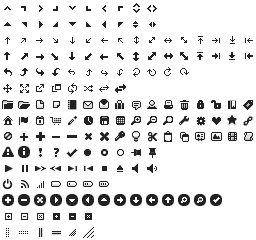
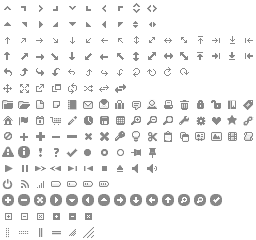
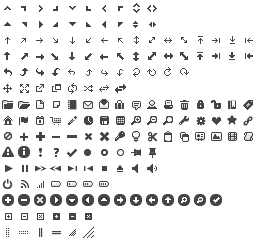
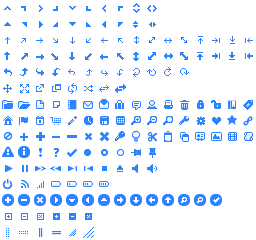
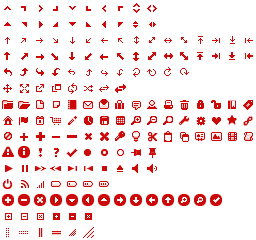
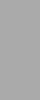

In [7]:
# Bokeh 0.11.0
# for more examples, see http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from bokeh import mpl
from bokeh.plotting import output_notebook, show
import matplotlib as mplc
# Generate the pandas dataframe
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=100)
data = pd.DataFrame(data, columns=["X", "Y"])
mplc.rc("figure", figsize=(6, 6))

# Just plot seaborn kde
import seaborn as sns
sns.kdeplot(data, cmap="BuGn_d")

plt.title("Seaborn kdeplot in bokeh.")

from bokeh.resources import INLINE
# default solution output_notebook() relies on pydata.org (but spare 2Mo of inline jsscript in your notebook)
# other method to get internal bokeh script can be
#    os.environ['BOKEH_RESOURCES'] = 'inline'
output_notebook(resources=INLINE)

show(mpl.to_bokeh())

:Layout
   .AdjointLayout.I :AdjointLayout
      :Histogram   [z]   (Frequency)
      :Overlay
         .Image.I :Image   [x,y]   (z)
         .HLine.I :HLine   [x,y]
   .Curve.I         :Curve   [x]   (z)
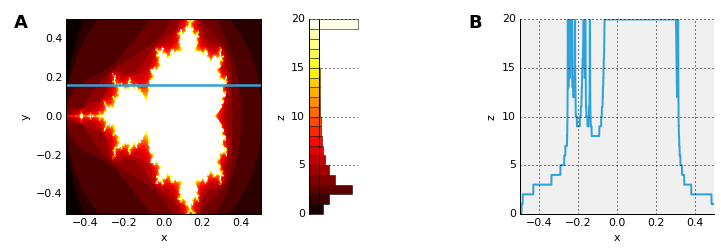

In [8]:
# Holoviews 
from holoviews import *
%load_ext holoviews.ipython
fractal = Image(image)

((fractal * HLine(y=0.16)).hist() + fractal.sample(y=0.16))

## Ipython Notebook: Interactivity & other

In [9]:
import IPython;IPython.__version__

'4.1.0rc2'

In [10]:
# Audio Example : https://github.com/ipython/ipywidgets/blob/master/examples/Beat%20Frequencies.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from IPython.display import Audio, display
def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    return signal
v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

220.0 224.0 4.0


array([  0.00000000e+00,   3.46966469e-01,   6.83408155e-01, ...,
        -6.83408155e-01,  -3.46966469e-01,   3.84296828e-13])

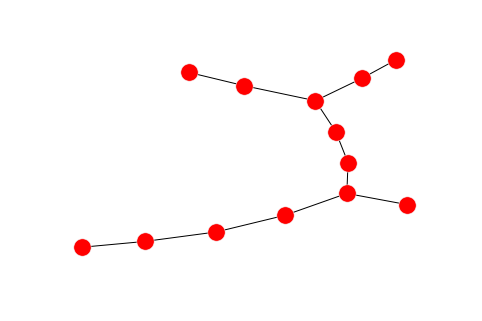

In [11]:
# Networks graph Example : https://github.com/ipython/ipywidgets/blob/master/examples/Exploring%20Graphs.ipynb
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import networkx as nx
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()
    

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });



In [12]:
# checking nbconvert 
!ipython nbconvert "Beginner's FAQ.ipynb" --to html

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert`... continue in 5 sec. Press Ctrl-C to quit now.
[NbConvertApp] Converting notebook Beginner's FAQ.ipynb to html
[NbConvertApp] Writing 193539 bytes to Beginner's FAQ.html


In [13]:
%%HTML
<iframe src="Beginner's FAQ.html" width=700 height350></iframe>

## Mathematical: statsmodels, lmfit, 

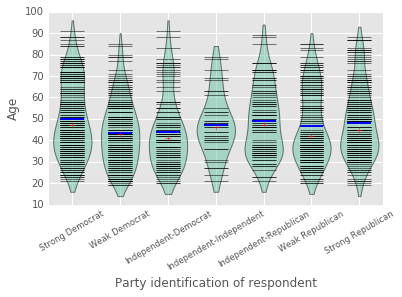

In [14]:
# checking statsmodels
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = ["Strong Democrat", "Weak Democrat", "Independent-Democrat",
          "Independent-Independent", "Independent-Republican",
          "Weak Republican", "Strong Republican"]
plt.rcParams['figure.subplot.bottom'] = 0.23  # keep labels visible
plt.rcParams['figure.figsize'] = (6.0, 4.0)  # make plot larger in notebook
age = [data.exog['age'][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts={'cutoff_val':5, 'cutoff_type':'abs',
                                'label_fontsize':'small',
                                'label_rotation':30}
sm.graphics.beanplot(age, ax=ax, labels=labels,
                     plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent")
ax.set_ylabel("Age")

 - Adding parameter "N"
 - Adding parameter "tau"


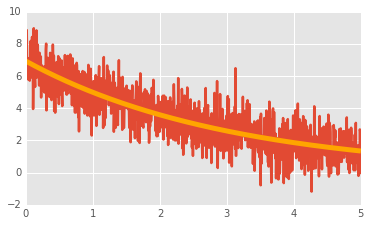

In [15]:
# lmfit test (from http://nbviewer.ipython.org/github/lmfit/lmfit-py/blob/master/examples/lmfit-model.ipynb)
import numpy as np
import matplotlib.pyplot as plt
def decay(t, N, tau):
    return N*np.exp(-t/tau)
t = np.linspace(0, 5, num=1000)
data = decay(t, 7, 3) + np.random.randn(*t.shape)

from lmfit import Model

model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=1)
plt.plot(t, data)  # data
plt.plot(t, decay(t=t, **result.values), color='orange', linewidth=5)  # best-fit model

## DataFrames: Pandas, Dask

In [16]:
#Pandas 
import pandas as pd
import numpy as np

idx = pd.date_range('2000', '2005', freq='d', closed='left')
datas = pd.DataFrame({'Color':  [ 'green' if x> 1 else 'red' for x in np.random.randn(len(idx))], 
         'Measure': np.random.randn(len(idx)), 'Year': idx.year},
          index=idx)
datas.head()

,Color,Measure,Year
2000-01-01,green,0.664050,2000
2000-01-02,red,-1.138152,2000
2000-01-03,red,-1.211623,2000
2000-01-04,red,-2.305295,2000
2000-01-05,red,2.355838,2000


### Split / Apply / Combine    
    Split your data into multiple independent groups.
    Apply some function to each group.
    Combine your groups back into a single data object.


In [17]:
datas.query('Measure > 0').groupby(['Color','Year']).size().unstack()

Year,2000,2001,2002,2003,2004
Color,,,,,
green,28,27,26,29,29
red,166,149,166,145,152


## Web Scraping: Beautifulsoup

In [18]:
# checking Web Scraping: beautifulsoup and requests 
import requests
from bs4 import BeautifulSoup

URL = 'http://en.wikipedia.org/wiki/Franklin,_Tennessee'

req = requests.get(URL, headers={'User-Agent' : "Mining the Social Web"})
soup = BeautifulSoup(req.text, "lxml")

geoTag = soup.find(True, 'geo')

if geoTag and len(geoTag) > 1:
    lat = geoTag.find(True, 'latitude').string
    lon = geoTag.find(True, 'longitude').string
    print ('Location is at', lat, lon)
elif geoTag and len(geoTag) == 1:
    (lat, lon) = geoTag.string.split(';')
    (lat, lon) = (lat.strip(), lon.strip())
    print ('Location is at', lat, lon)
else:
    print ('No location found')

Location is at 35.92917 -86.85750


## Operations Research: Pulp

In [19]:
# Pulp example : minimizing the weight to carry 99 pennies
#                (from Philip I Thomas)
# see https://www.youtube.com/watch?v=UmMn-N5w-lI#t=995
# Import PuLP modeler functions
from pulp import *
# The prob variable is created to contain the problem data        
prob = LpProblem("99 pennies Problem",LpMinimize)

# Variables represent how many of each coin we want to carry
pennies = LpVariable("Number of pennies",0,None,LpInteger)
nickels = LpVariable("Number of nickels",0,None,LpInteger)
dimes = LpVariable("Number of dimes",0,None,LpInteger)
quarters = LpVariable("Number of quarters",0,None,LpInteger)

# The objective function is added to 'prob' first

# we want to minimize (LpMinimize) this 
prob += 2.5 * pennies + 5 * nickels + 2.268 * dimes + 5.670 * quarters, "Total coins Weight"

# We want exactly 99 cents
prob += 1 * pennies + 5 * nickels + 10 * dimes + 25 * quarters == 99, ""

# The problem data is written to an .lp file
prob.writeLP("99cents.lp")
prob.solve()

# print ("status",LpStatus[prob.status] )
print ("Minimal Weight to carry exactly 99 pennies is %s grams" % value(prob.objective))
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print (v.name, "=", v.varValue)

Minimal Weight to carry exactly 99 pennies is 31.546 grams
Number_of_dimes = 2.0
Number_of_nickels = 0.0
Number_of_pennies = 4.0
Number_of_quarters = 3.0


## Deep Learning: Currently no Theano for WinPython 3.5

## Symbolic Calculation: sympy

In [20]:
# checking sympy 
import sympy
a, b =sympy.symbols('a b')
e=(a+b)**5
e.expand()

a**5 + 5*a**4*b + 10*a**3*b**2 + 10*a**2*b**3 + 5*a*b**4 + b**5

## SQL tools: sqlite, Ipython-sql, sqlite_bro, baresql, db.py

In [21]:
# checking Ipython-sql, sqlparse, SQLalchemy
%load_ext sql

In [22]:
%%sql sqlite:///.baresql.db
DROP TABLE IF EXISTS writer;
CREATE TABLE writer (first_name, last_name, year_of_death);
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Bertold', 'Brecht', 1956);
SELECT  * , sqlite_version() as sqlite_version from Writer order by Year_of_death

Done.
Done.
1 rows affected.
1 rows affected.
Done.


first_name,last_name,year_of_death,sqlite_version
William,Shakespeare,1616,3.8.11
Bertold,Brecht,1956,3.8.11


In [23]:
# checking baresql
from __future__ import print_function, unicode_literals, division  # line needed only if Python2.7
from baresql import baresql
bsql = baresql.baresql(connection="sqlite:///.baresql.db")
bsqldf = lambda q: bsql.df(q, dict(globals(),**locals()))

users = ['Alexander', 'Billy', 'Charles', 'Danielle', 'Esmeralda', 'Franz', 'Greg']
#  We use the python 'users' list like a SQL table
sql = "select 'Welcome ' ||  c0 || ' !' as say_hello, length(c0) as name_length from users$$ where c0 like '%a%' "
bsqldf(sql)

,say_hello,name_length
0,Welcome Alexander !,9
1,Welcome Charles !,7
2,Welcome Danielle !,8
3,Welcome Esmeralda !,9
4,Welcome Franz !,5


In [24]:
# checking db.py
from db import DB
db=DB(dbtype="sqlite", filename=".baresql.db")
db.query("select  sqlite_version() as sqlite_version  ;") 

Indexing schema. This will take a second...finished!


,sqlite_version
0,3.8.11


In [25]:
db.tables

Refreshing schema. Please wait...done!


Table,Columns
users$$,"index, c0"
writer,"first_name, last_name, year_of_death"


In [26]:
# checking sqlite_bro: this should lanch a separate non-browser window with sqlite_bro's welcome
!cmd start cmd /C sqlite_bro

## Wrap-up

In [27]:
# optional scipy full test (takes up to 10 minutes)
#!cmd /C start cmd /k python.exe  -c "import scipy;scipy.test()"